<a href="https://colab.research.google.com/github/jasonwong-lab/HKU-Practical-Bioinformatics/blob/main/Variant_calling_and_annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### HKU Practical Bioinformatics 2023 - "Variant calling"

*by Dr Jason Wong*

The objective of this lecture is to demonstrate how variants/mutations are called from aligned next-generation sequencing data and to annotate their impact on protein function.

## *** Set working directory

By default working directoy will be My Drive/PB_course

In [ ]:
# set working pathway to your own google drive doc (~ 1 min)
from google.colab import drive
drive.mount('/content/gdrive')                         # if using for the first time, you be requested to grant permission to link your Google Drive

import os
try:
  os.mkdir("/content/gdrive/My Drive/PB_course/")         # change this path if necessary
except FileExistsError:
  print("directory already exist. OK to continue")
os.chdir("/content/gdrive/My Drive/PB_course/")

In [ ]:
!pwd

## *** Package installation and downloads for workshop (~ 5 minutes)

1.   conda (for simple installation of packages)
2.   lofreq
3.   bedtools
4.   igv
5.   (optional) Download ready prepared files for analysis.  

**IMPORTANT: Every time you connect to Google Colab, you have to perform these set up steps again**

In [ ]:
# install conda (~ 1 min). There will be a message saying that the session has crashed but don't worry about this. This is due to the session restarting following conda installation
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
# install lofreq (~ 1 mins)
!conda install -c bioconda lofreq

In [ ]:
!apt install bedtools

In [ ]:
#Install igv-notebook
!pip install igv-notebook

In [ ]:
# Check if you already have the BAM files generated from last lecture+exercise
!ls -l /content/gdrive/MyDrive/PB_course/Datasets/BAM

In [ ]:
# If you don't have WXS_example_*_sorted.bam run this cell
import os
os.chdir("/content/gdrive/My Drive/PB_course/Datasets/")
if os.path.isfile("/content/gdrive/MyDrive/PB_course/Datasets/BAM/WXS_example_sorted.bam"):    # check if the file exist
  print("file already exist, OK to continue.")
else:
  !wget -O WXS_BAMs.zip https://github.com/jasonwong-lab/HKU-Practical-Bioinformatics/raw/main/files/WXS_BAMs.zip
  !unzip -o WXS_BAMs.zip   #unzip file
  !rm WXS_BAMs.zip

## Variant calling command line

1.1. Download file

1.2. Variant calling using LoFreq

1.3. Using bedtools to identify coding variants

In [ ]:
!lofreq

In [ ]:
# Variant calling using LoFreq
!lofreq call

In [ ]:
#Step 1 – Create directory to store VCF files. Make sure we are in the Datasets directory.
%cd /content/gdrive/My Drive/PB_course/Datasets/
!mkdir VCF/

In [ ]:
#Step 2 – Run LoFreq call
!rm VCF/*.vcf
!lofreq call ./BAM/WXS_example_sorted.bam -o ./VCF/WXS_germline_nofilter.vcf -f ../DB_trunc/chr2.fa --verbose --no-default-filter

In [ ]:
#Step 3 - Run LoFreq filter
!lofreq filter --print-all -i ./VCF/WXS_germline_nofilter.vcf -o ./VCF/WXS_germline_filter.vcf

In [ ]:
#check result:
!head -n 30 ./VCF/WXS_germline_filter.vcf

In [ ]:
import igv_notebook

igv_notebook.init()

b = igv_notebook.Browser(
    {
        "genome": "hg38",
        "locus": "chr2:5876477-5876517"
    }
)

b.load_track(
    {
        "name": "WXS",
        "path": "./BAM/WXS_example_sorted.bam",
        "indexPath": "./BAM/WXS_example_sorted.bam.bai",
        "format": "bam",
        "type": "alignment"
    })

### Using bedtools to identify coding variants.
UCSC genome browser: https://genome.ucsc.edu

TABLE BROWSER : https://genome.ucsc.edu/cgi-bin/hgTables   
Output file: hg38_gencode_exon_coding.bed

In [ ]:
#Create a folder called Annotations
%cd /content/gdrive/My Drive/PB_course/Datasets/
!mkdir Annotations/

In [ ]:
#download the annotation file
#(although you downloaded one from the UCSC table browser, for convinence a copy has been put on a server to be directly copied to Colab)
!wget -O Annotations/hg38_gencode_exon_coding.bed https://cloudstor.aarnet.edu.au/plus/s/wnFIjB9mT4uJqUi/download

In [ ]:
#Rerun lofreq filter to only print PASS variants
!lofreq filter -i ./VCF/WXS_germline_nofilter.vcf -o ./VCF/WXS_germline.vcf

In [ ]:
#Use intersectBed to find out which variants in the VCF file is in coding regions.
!intersectBed -a ./VCF/WXS_germline.vcf -b ./Annotations/hg38_gencode_exon_coding.bed -u > ./VCF/WXS_germline_coding.vcf

In [ ]:
#Count the number of lines in WXS_germline_coding.vcf
!wc -l ./VCF/WXS_germline_coding.vcf

In [ ]:
#Count the number of lines in WXS_germline.vcf. Remove the header by grep
!grep -v '#' ./VCF/WXS_germline.vcf | wc -l

### Check the functional impact of variants

VEP online: http://useast.ensembl.org/Tools/VEP

upload file: HOME > Datasets > VCF > WGS_germline.vcf

In [ ]:
#download the WGS_germline.vcf file for upload to VEP

from google.colab import files
files.download('./VCF/WXS_germline.vcf')

VEP analysis

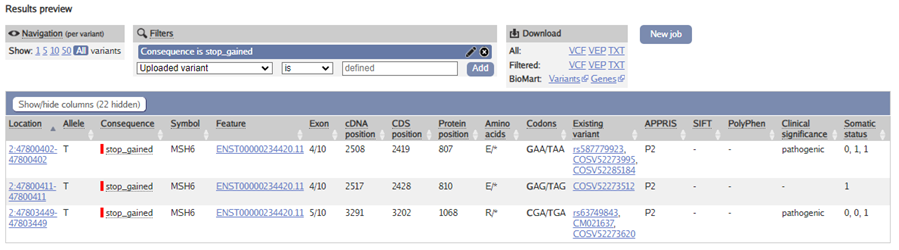

In [ ]:
# examine the MSH6 stop gained mutations
!grep 4780 ./VCF/WXS_germline.vcf | grep chr2

### IGV browser

In [ ]:
#Load track from local paths
import igv_notebook

igv_notebook.init()

b = igv_notebook.Browser(
    {
        "genome": "hg38",
        "locus": "chr2:47,800,395-47,800,415"
    }
)

b.load_track(
    {
        "name": "WXS",
        "path": "./BAM/WXS_example_sorted.bam",
        "indexPath": "./BAM/WXS_example_sorted.bam.bai",
        "format": "bam",
        "type": "alignment"
    }
)